<a href="https://colab.research.google.com/github/AdityaTak77/AdityaTak77/blob/main/Health_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROBLEM STATEMENT**

A key challenge for the insurance industry is to charge each customer an appropriate premium for the risk they represent. The ability to predict a correct claim amount has a significant impact on insurer's management decisions and financial statements. Predicting the cost of claims in an insurance company is a real-life problem that needs to be solved in a more accurate and automated way. Several factors determine the cost of claims based on health factors like BMI, age, smoker, health conditions and others. Insurance companies apply numerous techniques for analyzing and predicting health insurance costs

#Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import SelectKBest, mutual_info_regression
import seaborn as sns
import plotly.express as px
%matplotlib inline
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
!pip install dataprep
from dataprep.eda import create_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# TO HIDE WARNINGS
import warnings
warnings.filterwarnings('ignore')

#Importing the dataset

In [ ]:
df= pd.read_csv("/content/1651277648862_healthinsurance.csv")
df

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,39.0,male,49,28.3,NoDisease,1,1,Florence,54,1,0,FilmMaker,21082.2
14996,39.0,male,74,29.6,NoDisease,4,0,Miami,64,1,0,Student,7512.3
14997,20.0,male,62,33.3,NoDisease,0,0,Tampa,52,1,0,FashionDesigner,1391.5
14998,52.0,male,88,36.7,NoDisease,0,0,PanamaCity,70,1,0,Farmer,9144.6


#**EDA**

## Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


In [ ]:
pd.isnull(df).sum()

age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64

since the null values are around 1000 from 15000 it will not affect much of our data replacing will only make our data more worse so we should remove those rows

In [ ]:
df['job_title'].unique()

array(['Actor', 'Engineer', 'Academician', 'Chef', 'HomeMakers', 'Dancer',
       'Singer', 'DataScientist', 'Police', 'Student', 'Doctor',
       'Manager', 'Photographer', 'Beautician', 'CA', 'Blogger', 'CEO',
       'Labourer', 'Accountant', 'FilmDirector', 'Technician',
       'FashionDesigner', 'Architect', 'HouseKeeper', 'FilmMaker',
       'Buisnessman', 'Politician', 'DefencePersonnels', 'Analyst',
       'Clerks', 'ITProfessional', 'Farmer', 'Journalist', 'Lawyer',
       'GovEmployee'], dtype=object)

In [ ]:
df.dropna(subset=['bmi', 'age'], inplace=True)

In [ ]:
pd.isnull(df).sum()

age                    0
sex                    0
weight                 0
bmi                    0
hereditary_diseases    0
no_of_dependents       0
smoker                 0
city                   0
bloodpressure          0
diabetes               0
regular_ex             0
job_title              0
claim                  0
dtype: int64

In [ ]:
df.shape

(13648, 13)

In [ ]:
df.describe()

,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim
count,13648.000000,13648.000000,13648.000000,13648.000000,13648.000000,13648.000000,13648.000000,13648.000000,13648.000000
mean,39.586533,64.689478,30.287295,1.106462,0.198124,68.628737,0.783118,0.223110,13416.465050
std,14.040870,13.655520,6.133622,1.209568,0.398601,19.443669,0.412136,0.416347,12080.022325
min,18.000000,34.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.900000
25%,27.000000,54.000000,25.700000,0.000000,0.000000,64.000000,1.000000,0.000000,4889.000000
50%,40.000000,63.000000,29.400000,1.000000,0.000000,72.000000,1.000000,0.000000,9715.800000
75%,52.000000,75.000000,34.400000,2.000000,0.000000,80.000000,1.000000,0.000000,16450.900000
max,64.000000,95.000000,53.100000,5.000000,1.000000,122.000000,1.000000,1.000000,63770.400000


# Data Visualisation

Univariate plots

#Piecharts

In [ ]:
labels = df['sex'].value_counts().index
values = df['sex'].value_counts().values
fig = px.pie(labels, values = values, names = labels)
fig.update_traces(title = 'sex', title_font = dict(size=20,family='Verdana',color='black'),
                   hoverinfo='label+percent',textinfo='percent', textfont_size=15)
fig.show()

(-1.0999991218732503,
 1.0999893278674626,
 -1.0999992001677108,
 1.0999961577634974)

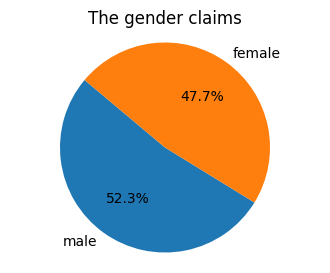

In [ ]:
#pie chart for top 10 claim with sex
top_cities = df.groupby('sex')['claim'].mean().nlargest(10)

plt.figure(figsize=(4, 3))
plt.pie(top_cities, labels=top_cities.index, autopct='%1.1f%%',startangle=140)
plt.title('The gender claims')

plt.axis('equal')

(-1.0999999998865289,
 1.0999999984203632,
 -1.0999999842445765,
 1.09999999552299)

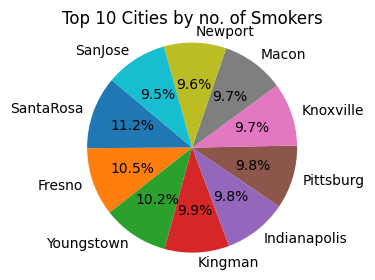

In [ ]:
#pie chart for top 10 cities with smokers
top_cities = df.groupby('city')['smoker'].mean().nlargest(10)

plt.figure(figsize=(4, 3))
plt.pie(top_cities, labels=top_cities.index, autopct='%1.1f%%',startangle=140)
plt.title('Top 10 Cities by no. of Smokers')

plt.axis('equal')

(-1.0999998109091873,
 1.0999998890147105,
 -1.0999998610243271,
 1.099999987673372)

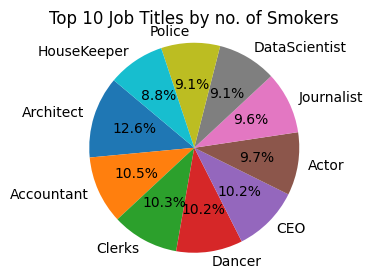

In [ ]:
#pie chart for top 10 job titles with smoker
top_cities = df.groupby('job_title')['smoker'].mean().nlargest(10)

plt.figure(figsize=(4, 3))
plt.pie(top_cities, labels=top_cities.index, autopct='%1.1f%%',startangle=140)
plt.title('Top 10 Job Titles by no. of Smokers')

plt.axis('equal')

(-1.0999990322465214,
 1.0999999190004714,
 -1.0999999984874964,
 1.0999999790610844)

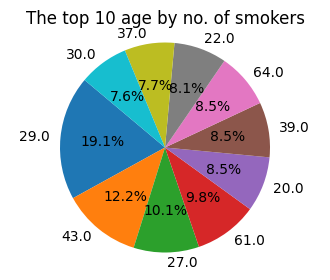

In [ ]:
#pie chart for top 10 claim with sex
top_cities = df.groupby('age')['smoker'].mean().nlargest(10)

plt.figure(figsize=(4, 3))
plt.pie(top_cities, labels=top_cities.index, autopct='%1.1f%%',startangle=140)
plt.title('The top 10 age by no. of smokers')

plt.axis('equal')

In [ ]:
cols = ['sex','hereditary_diseases','job_title']
def PlotBarCharts(inpData, colsToPlot):
     fig,subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
     fig.suptitle('Bar charts of: '+ str(colsToPlot))

     for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

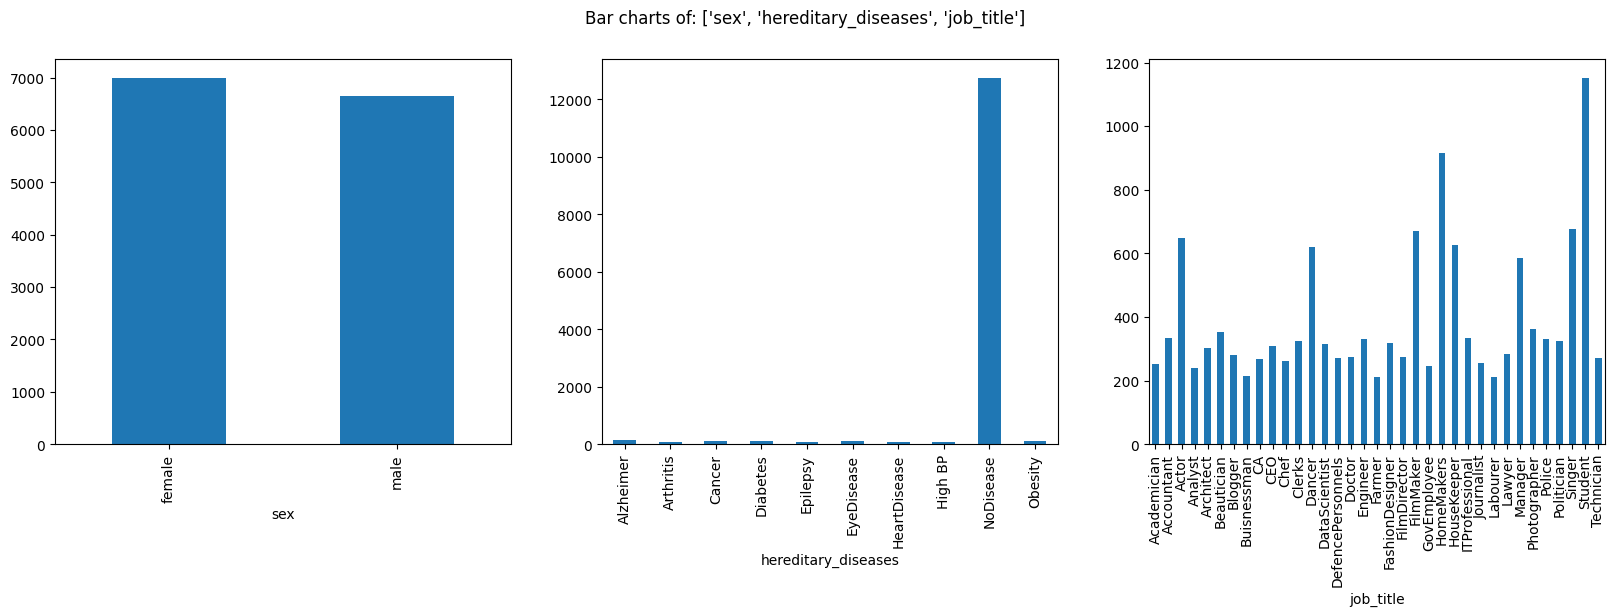

In [ ]:
PlotBarCharts(inpData=df, colsToPlot=cols)

## Distributions of some continuous variables w.r.t. the target variable

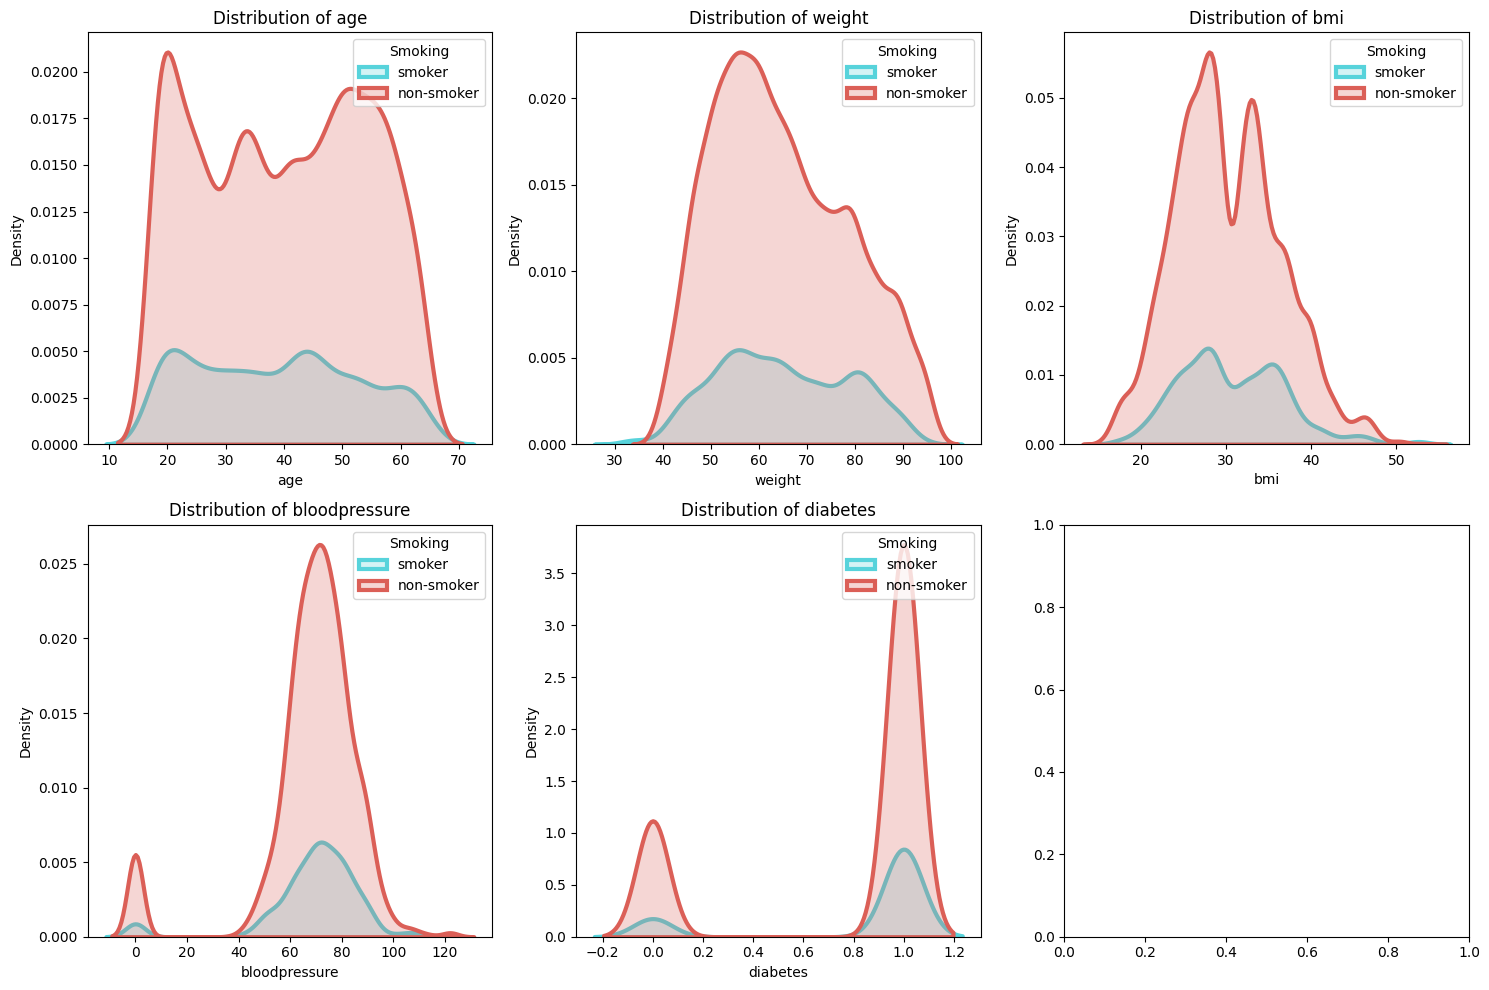

In [ ]:
# Assuming df is your dataset
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
x_col = ['age', 'weight', 'bmi', 'bloodpressure', 'diabetes']
for x, ax in zip(x_col, axs.flatten()):
    sns.kdeplot(data=df, x=x, hue='smoker', palette='hls', linewidth=3, fill=True, ax=ax)
    ax.set_title('Distribution of ' + x)
    ax.legend(labels=['smoker', 'non-smoker'], title='Smoking')

plt.tight_layout()
plt.show()

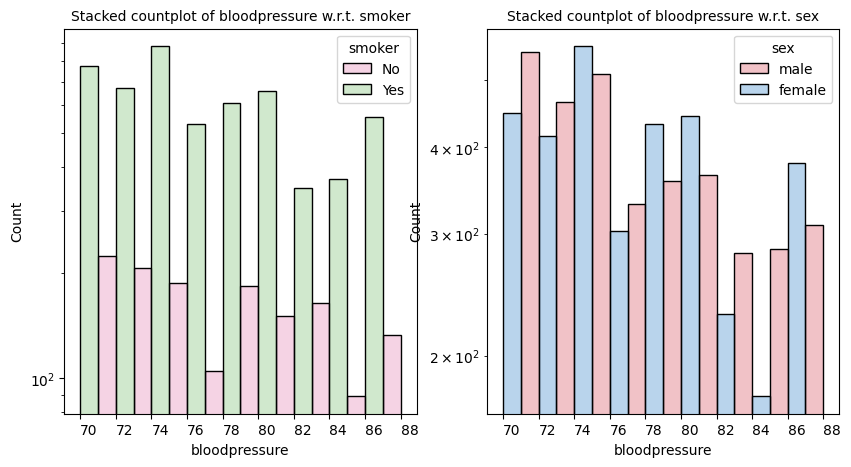

In [ ]:
colors = ['#75aadb', '#e58691', '#a2d39c', '#eda9ca']

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax = ax.flatten()

# Iterate over 'smoker' and 'sex'
for i, (hue, labels) in enumerate(zip(['smoker', 'sex'], [['No', 'Yes'], ['male', 'female']])):
    palette = colors[:2] if i == 1 else colors[2:]

    # Create a stacked countplot
    sns.histplot(data=df, x='bloodpressure', hue=hue, ax=ax[i], multiple='dodge', bins=np.arange(70, 90, 2),
                 palette=palette, linewidth=1, edgecolor='black', alpha=.5)

    ax[i].xaxis.set_major_locator(plt.FixedLocator(np.arange(70, 90, 2)))

    for tick in ax[i].get_xticklabels():
        tick.set_horizontalalignment("left")

    ax[i].set_yscale('log')
    ax[i].legend(labels=labels, title=hue)
    ax[i].set_title(f'Stacked countplot of bloodpressure w.r.t. {hue}', fontsize=10)

plt.show()

#Bivariate Plot

In [ ]:
name = ['age', 'weight', 'bmi', 'bloodpressure', 'diabetes','regular_ex','no_of_dependents']
fig = px.scatter_matrix(df,
    dimensions=name, color='smoker')
fig.update_layout(
    title='Smoking Dataset',
    width=2000,
    height=2000,
)
fig.show()

#Heatmap

In [ ]:
# separation of numerical and categorical data to different datasets

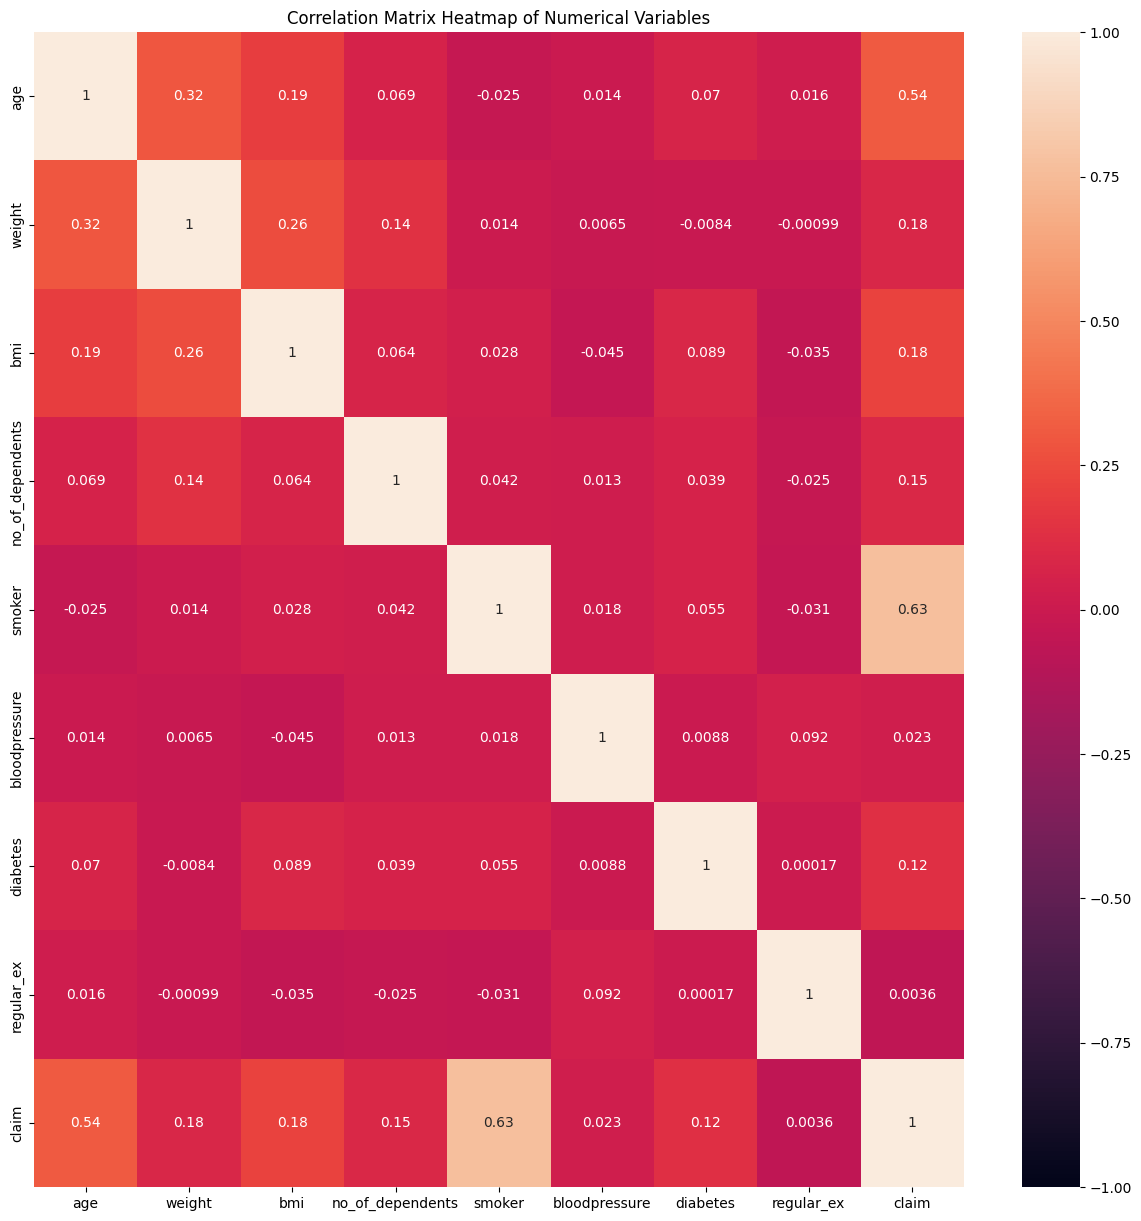

In [ ]:
numerical_variables_list = [col for col in df.columns if df[col].dtype in ["float64", "int64"]]
numerical_variables = df[numerical_variables_list]

categorical_variables_list = [col for col in df.columns if df[col].dtype == "object"]
categorical_variables = df[categorical_variables_list]

# Plotting the correlation matrix heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(numerical_variables.corr(method="pearson"), vmin=-1, vmax=1, annot=numerical_variables.corr(method="spearman").to_numpy())
plt.title("Correlation Matrix Heatmap of Numerical Variables")
plt.show()

#Multivariate

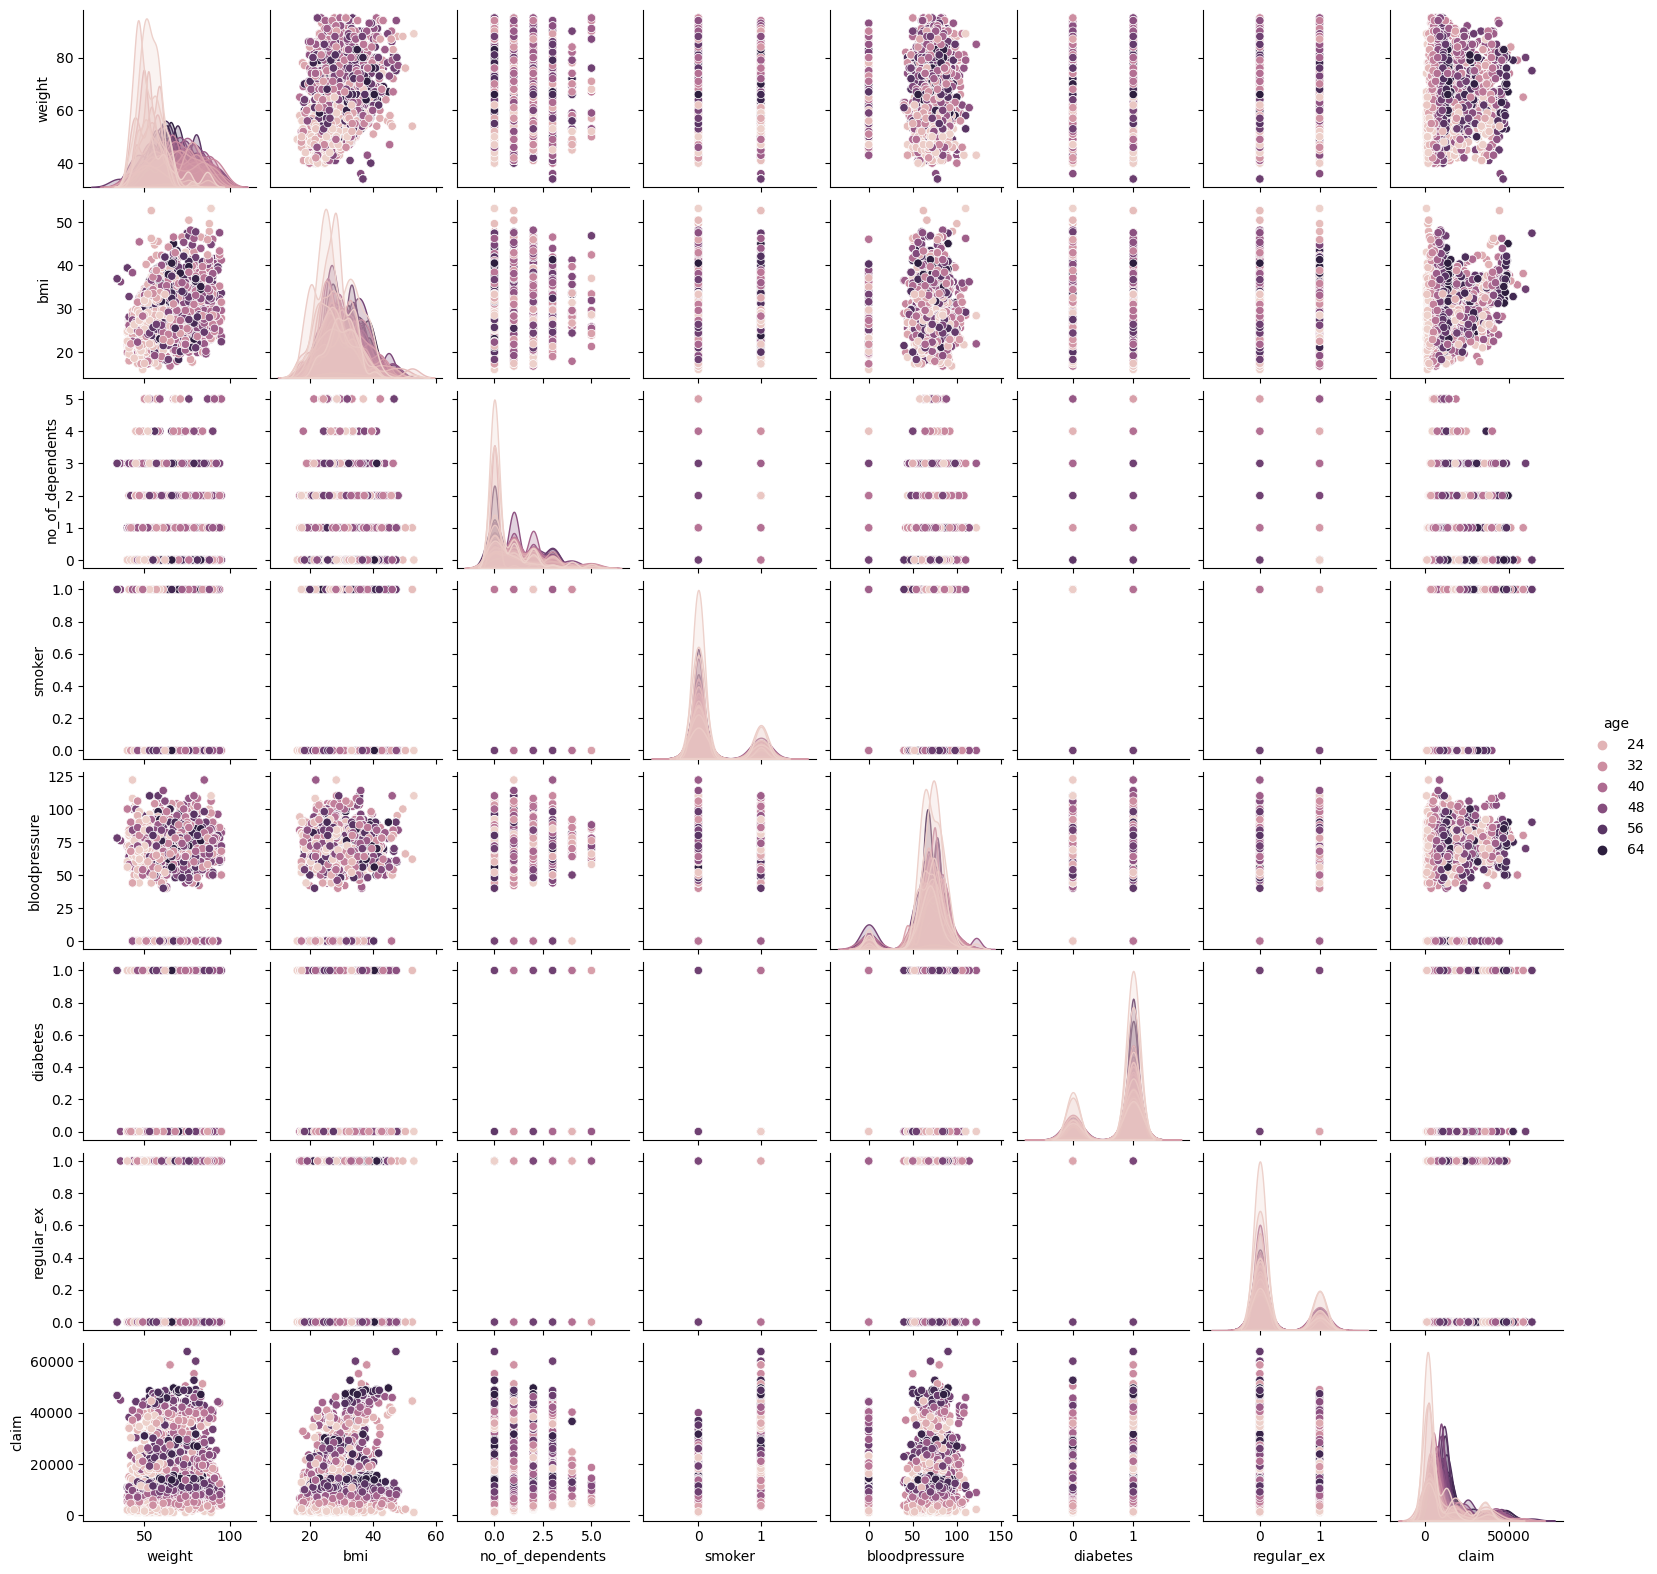

In [ ]:
#visualisation
sns.pairplot(df, hue='age', height=2) #mu ltivariate

Outlier Detection

In [ ]:
df.skew()

age                 0.008522
weight              0.304288
bmi                 0.377576
no_of_dependents    0.938149
smoker              1.514899
bloodpressure      -1.962741
diabetes           -1.374108
regular_ex          1.330291
claim               1.490132
dtype: float64

boxplot

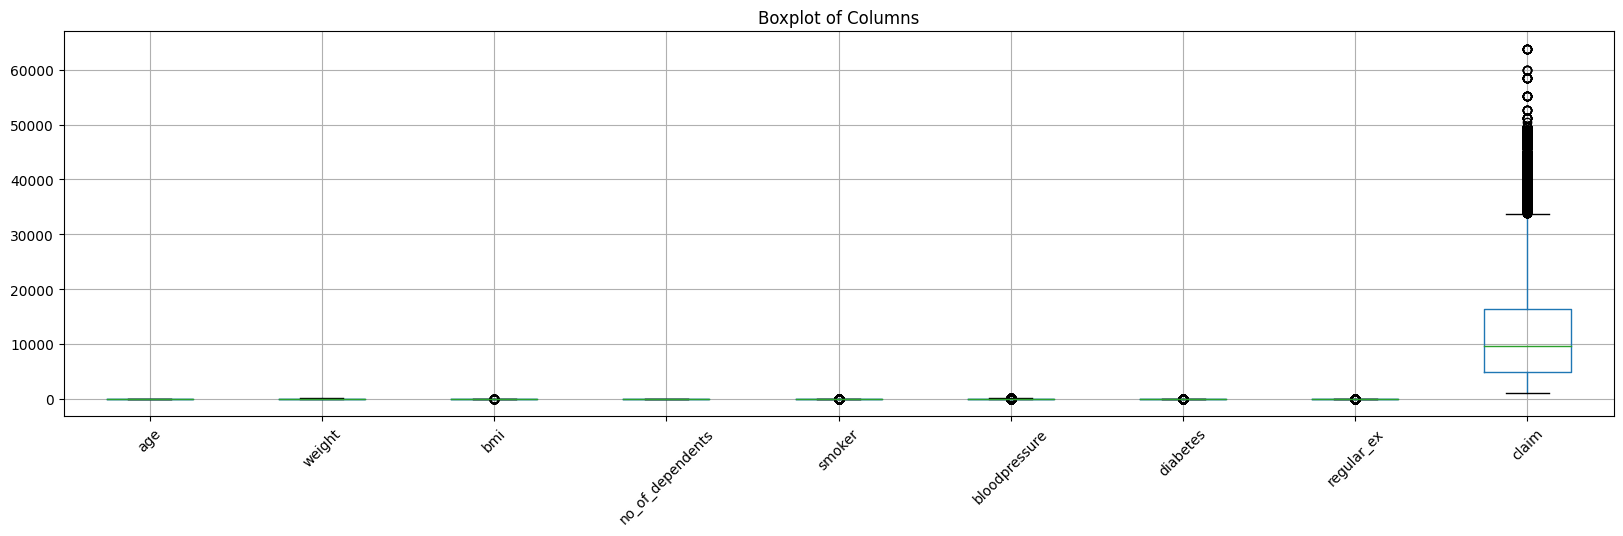

In [ ]:
# Boxplot
df.boxplot(rot=45, figsize=(20, 5))
plt.title("Boxplot of Columns")
plt.show()

In [ ]:
cols = ['age', 'weight', 'bmi', 'no_of_dependents', 'smoker', 'bloodpressure', 'diabetes', 'regular_ex', 'claim']
for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    df[col] = np.where(df[col] >= upper_bound, upper_bound, np.where(df[col] <= lower_bound, lower_bound, df[col]))


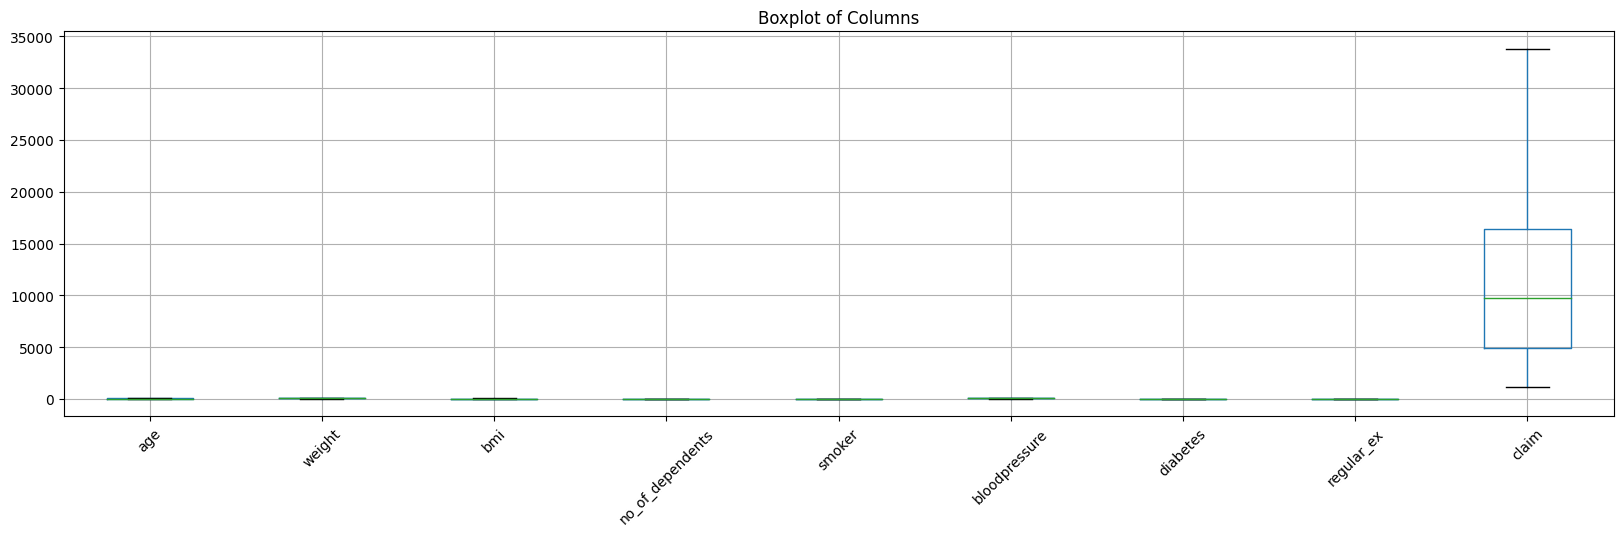

In [ ]:
df.boxplot(rot=45, figsize=(20, 5))
plt.title("Boxplot of Columns")
plt.show()

In [ ]:
df.shape

(13648, 13)

Encoding

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
cols = ['job_title', 'city', 'hereditary_diseases']
for col in cols:
  df[col]= label_encoder.fit_transform(df[col])

In [ ]:
df = pd.get_dummies(df, columns = ['sex'])
df

,age,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim,sex_female,sex_male
0,60.0,64.0,24.3,8,1.0,0.0,55,72.0,1.0,0.0,2,13112.60,0,1
1,49.0,75.0,22.6,8,1.0,0.0,5,78.0,1.0,0.0,16,9567.00,1,0
2,32.0,64.0,17.8,4,2.0,0.0,63,88.0,1.0,0.0,0,32734.20,1,0
3,61.0,53.0,36.4,8,1.0,0.0,64,72.0,1.0,0.0,10,33793.75,1,0
4,19.0,50.0,20.6,8,0.0,0.0,8,82.0,1.0,0.0,22,1731.70,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,39.0,49.0,28.3,8,1.0,0.0,24,54.0,1.0,0.0,20,21082.20,0,1
14996,39.0,74.0,29.6,8,4.0,0.0,49,64.0,1.0,0.0,33,7512.30,0,1
14997,20.0,62.0,33.3,8,0.0,0.0,82,52.0,1.0,0.0,18,1391.50,0,1
14998,52.0,88.0,36.7,8,0.0,0.0,61,70.0,1.0,0.0,17,9144.60,0,1


## Splitting

In [ ]:
# select dependent variable (class)
y = df["claim"]

# select independent variable (feature)
X = df.drop("claim", axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,shuffle=True,random_state=1)

## Standard Scaling

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))

## Feature Importance

In [ ]:
pd.isnull(df).sum()

age                    0
weight                 0
bmi                    0
hereditary_diseases    0
no_of_dependents       0
smoker                 0
city                   0
bloodpressure          0
diabetes               0
regular_ex             0
job_title              0
claim                  0
sex_female             0
sex_male               0
dtype: int64

In [ ]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X_train_scaled, y_train)
feature_scores = pd.DataFrame({'feature_names': X_train.columns, 'mutual_info_scores': mutual_info})
feature_scores = feature_scores.sort_values('mutual_info_scores', ascending=False)
print(feature_scores)


          feature_names  mutual_info_scores
2                   bmi            4.406380
1                weight            3.216767
0                   age            3.139600
10            job_title            2.819896
7         bloodpressure            2.689916
4      no_of_dependents            1.151932
11           sex_female            0.574859
12             sex_male            0.567101
3   hereditary_diseases            0.150396
6                  city            0.002860
5                smoker            0.000000
8              diabetes            0.000000
9            regular_ex            0.000000


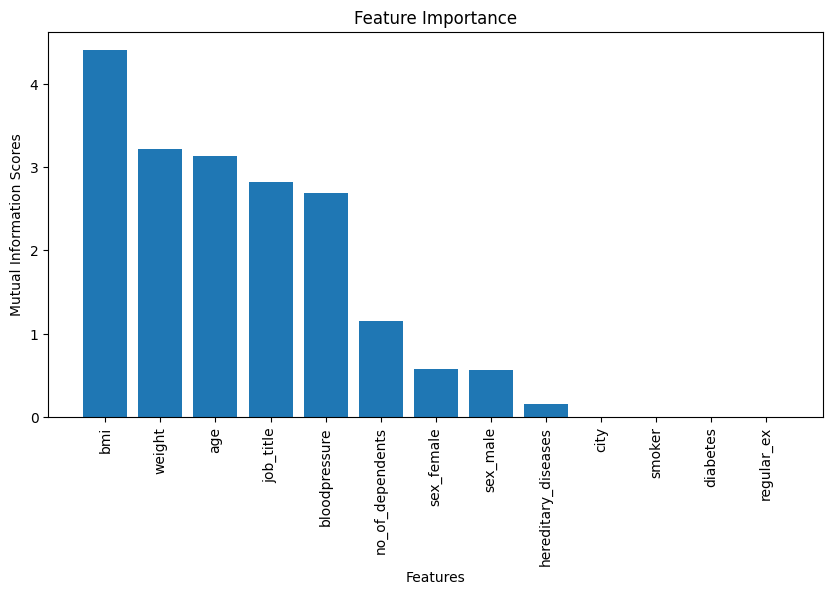

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(feature_scores['feature_names'], feature_scores['mutual_info_scores'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Mutual Information Scores')
plt.title('Feature Importance')
plt.show()

In [ ]:
k_best = SelectKBest(mutual_info_regression, k=9)
X_train_selected = k_best.fit_transform(X_train_scaled, y_train)
X_test_selected = k_best.transform(X_test_scaled)

In [ ]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor(n_estimators=150)
knn = KNeighborsRegressor()
mlp = MLPRegressor()
xgb = XGBRegressor()
svm = SVR()

# Create a list of tuples containing model names and instances
regression_models = [('Linear Regression', lr), ('KNN', knn),
                     ('Multi-layer Perceptron Regressor', mlp),
                     ('XGBoost Regressor', xgb),
                     ('Support Vector Machine', svm),
                     ('Decision Tree', dt), ('Random Forest', rf)]

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

results_regression = []
for name, model in regression_models:
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results_regression.append((name, mse, mae, r2))

df_regression = pd.DataFrame(results_regression, columns=['Model', 'Mean Squared Error', 'Mean Absolute Error', 'R-squared'])
df_regression.set_index('Model', inplace=True)
df_regression = df_regression.round(4)
df_regression


,Mean Squared Error,Mean Absolute Error,R-squared
Model,,,
Linear Regression,6.772110e+07,6548.6455,0.3206
KNN,9.196002e+06,706.5292,0.9077
Multi-layer Perceptron Regressor,9.080150e+07,7732.3165,0.0891
XGBoost Regressor,5.016861e+06,969.1741,0.9497
Support Vector Machine,1.053365e+08,7262.1091,-0.0567
Decision Tree,6.006497e+06,361.2786,0.9397
Random Forest,3.425942e+06,322.0818,0.9656


* Mean Squared Error (MSE): Lower values indicate better performance.
* Mean Absolute Error (MAE): Lower values indicate better performance.
* R-squared (R²): Closer to 1 indicates better performance.
Based on the provided results:

Random Forest has the lowest Mean Squared Error (MSE) and Mean Absolute Error (MAE), indicating better predictive performance in terms of minimizing the prediction errors.

Decision Tree also shows strong performance with low MSE and MAE.

XGBoost Regressor has a very low MSE and high R-squared, indicating excellent predictive performance.

Choosing the "best" model depends on your specific requirements and the importance you give to different metrics. If interpretability is crucial, you might prefer a Decision Tree. If you prioritize predictive accuracy and can handle a more complex model, Random Forest or XGBoost might be preferable.


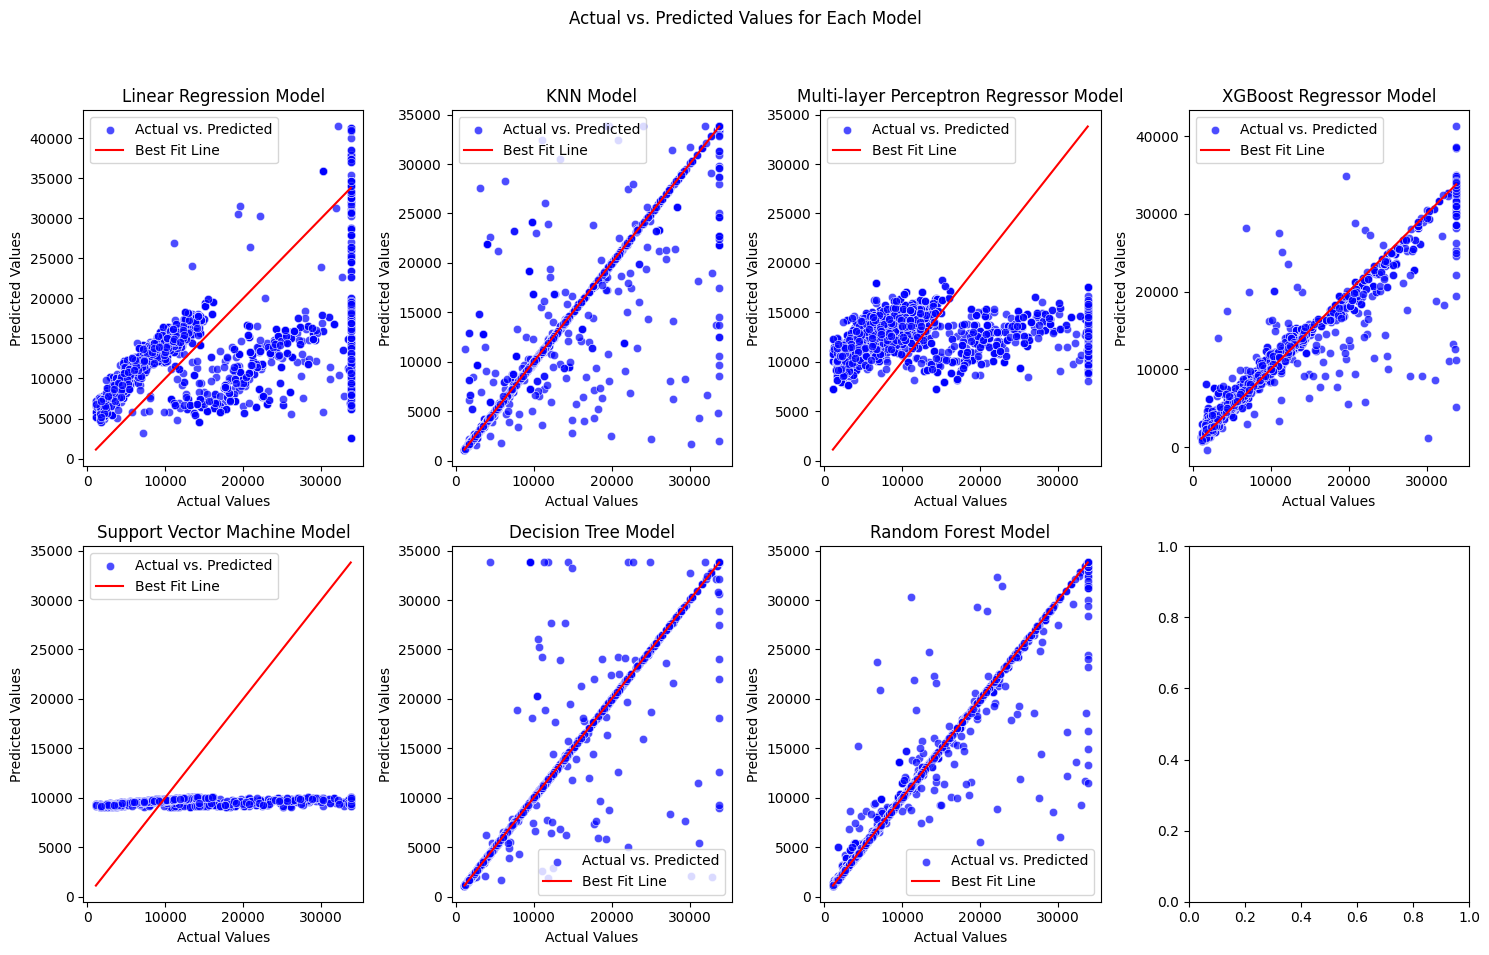

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
fig.suptitle('Actual vs. Predicted Values for Each Model')

# Function to plot best fit line curve for a model
def plot_best_fit_line(model, name, ax):
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)

    # Scatter plot
    sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.7, label='Actual vs. Predicted', ax=ax)
    # Best fit line
    sns.lineplot(x=y_test, y=y_test, color='red', label='Best Fit Line', ax=ax)
    ax.set_title(f'{name} Model')
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.legend()
# Plot best fit line curve for each model
for (name, model), ax in zip(regression_models, axes.flatten()):
    plot_best_fit_line(model, name, ax)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


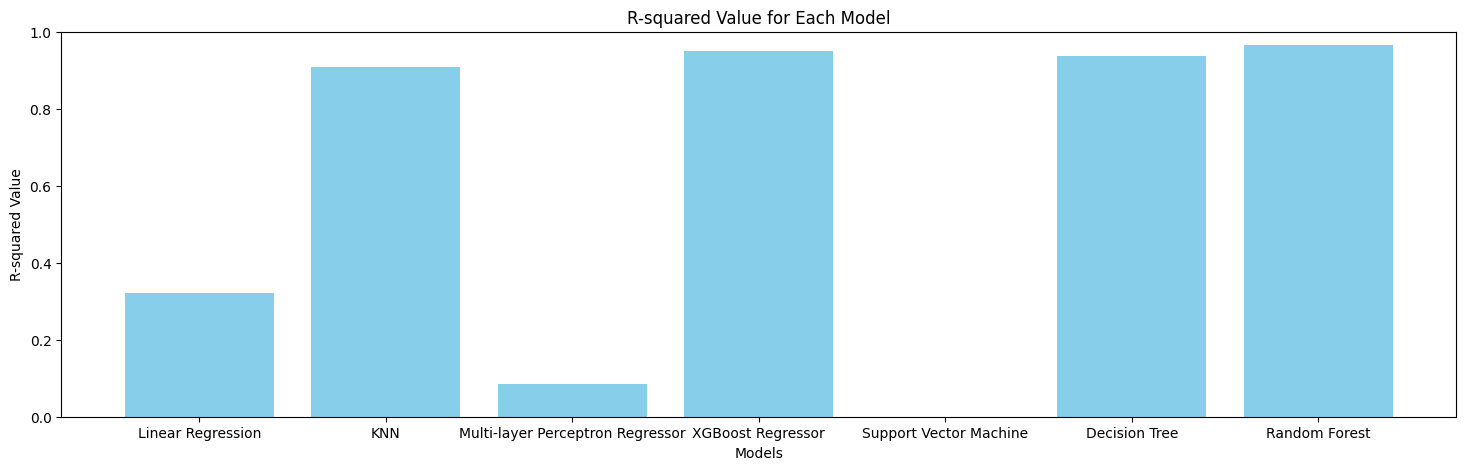

In [ ]:
# Create a dictionary to store R-squared values for each model
r_squared_values = {}
# Function to calculate and plot R-squared curve for a given model
def plot_r_squared_curve(model, name):
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    r_squared = r2_score(y_test, y_pred)
    r_squared_values[name] = r_squared
    return r_squared

# Calculate and plot R-squared values for each model
for name, model in regression_models:
    plot_r_squared_curve(model, name)

# Plotting the R-squared curve
plt.figure(figsize=(18, 5))
plt.bar(r_squared_values.keys(), r_squared_values.values(), color='skyblue')
plt.xlabel('Models')
plt.ylabel('R-squared Value')
plt.title('R-squared Value for Each Model')
plt.ylim(0, 1)  # Setting y-axis limit to ensure proper visualization of R-squared values
plt.show()